# 1. 아래와 같이 데이터 프레임을 만들어 보세요.

In [52]:
import pandas as pd 
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
#f_path = "/Library/Fonts/AppleGothic.ttf (맥, Mac)
f_path = "C:/Windows/Fonts/malgun.ttf"
#(윈도우즈,Windows)
font_name = font_manager.FontProperties(fname= f_path).get_name()
rc('font', family = font_name)



In [53]:
person = pd.DataFrame({'name': ['Dinal','Harry','Olivia', 'Emma','Brian'], 'age':[23,30,30,40,45],
                      'job':['student', 'developer','teacher','dentist', 'manager'], 
                       'sex':['male','male','female','female','female']})

In [54]:
person

,name,age,job,sex
0,Dinal,23,student,male
1,Harry,30,developer,male
2,Olivia,30,teacher,female
3,Emma,40,dentist,female
4,Brian,45,manager,female


# 2. 데이터 프레임을 person.csv로 저장해 보세요

In [55]:
person.to_csv('../data/person.csv')

# 3. 0,4 번 행을 선택하여 출력해 보세요

In [56]:
person.iloc[[0,4]]

,name,age,job,sex
0,Dinal,23,student,male
4,Brian,45,manager,female


# 4. 데이터 프레임에서 'name'과  'job'열만 출력해보세요

In [57]:
person[['name', 'job']]

,name,job
0,Dinal,student
1,Harry,developer
2,Olivia,teacher
3,Emma,dentist
4,Brian,manager


# 5. 나이가 30이상이고, 이름이 'Olivia'인 사람만 출력해 보세요

In [58]:
person[(person['age'] >=30) & (person['name'] == 'Olivia')]

,name,age,job,sex
2,Olivia,30,teacher,female


# 6. 남성은 0, 여성은 1을 부여해 sex1 칼럼을 추가해 보세요.

In [59]:
def new_sex(vec):
    if vec['sex'] == 'female':
         return 1
    else: 
         return 0
        
person['sex_1'] = person.apply(new_sex, axis = 1)

In [60]:
person

,name,age,job,sex,sex_1
0,Dinal,23,student,male,0
1,Harry,30,developer,male,0
2,Olivia,30,teacher,female,1
3,Emma,40,dentist,female,1
4,Brian,45,manager,female,1


# 7. 막대 그래프로 출력해 보세요.

Text(0,0.5,'나이')

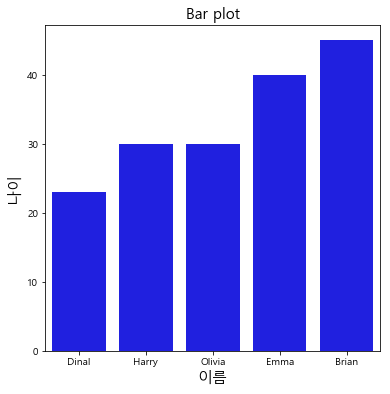

In [65]:
ax = plt.subplots(figsize = (6,6))
ax = sns.barplot( x= 'name', y = 'age', data = person, color ='blue')
ax.set_title('Bar plot', size = 15)
ax.set_xlabel('이름', size = 15)
ax.set_ylabel('나이', size = 15)


# 8.test_data6.tsv 파일을 로드하시고, 기초 통계량을 출력하세요.

In [142]:
test_data = pd.read_table('../data/test_data6.tsv')
test_data.describe()


,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


# 9. 주문한 item_name의 갯수를 출력하세요.

In [80]:
count_item = test_data.groupby('item').quantity.count()
count_item = pd.DataFrame(count_item).reset_index()
count_item.head()

,item,quantity
0,6 Pack Soft Drink,54
1,Barbacoa Bowl,66
2,Barbacoa Burrito,91
3,Barbacoa Crispy Tacos,11
4,Barbacoa Salad Bowl,10


# 10. 가장 많이 주문한 아이템 5개만 출력하세요.

In [139]:
sort_item = count_item.sort_values('quantity', ascending = False).head()
for i in range(5):
    print("Best %d : %s %d"%(i+1, sort_item['item'].iloc[i],sort_item['quantity'].iloc[i]))

Best 1 : Chicken Bowl 726
Best 2 : Chicken Burrito 553
Best 3 : Chips and Guacamole 479
Best 4 : Steak Burrito 368
Best 5 : Canned Soft Drink 301
